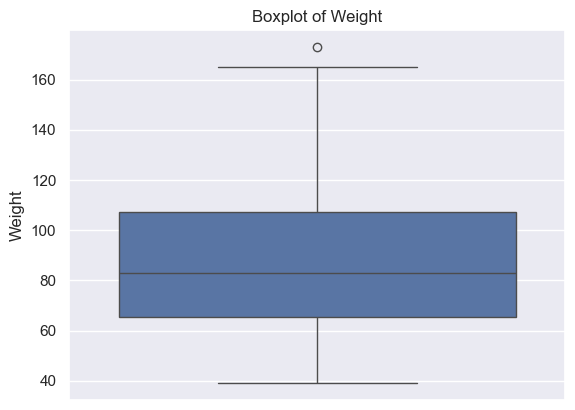

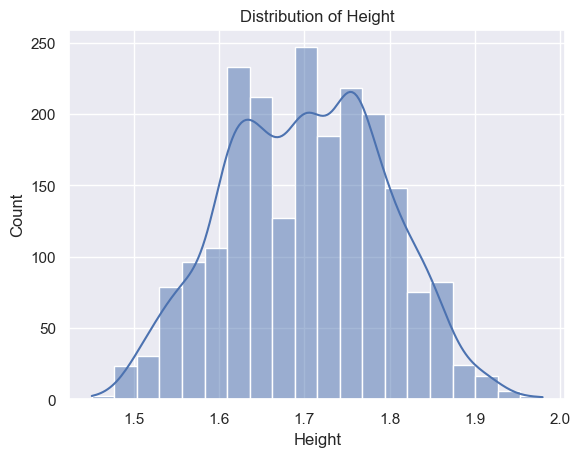

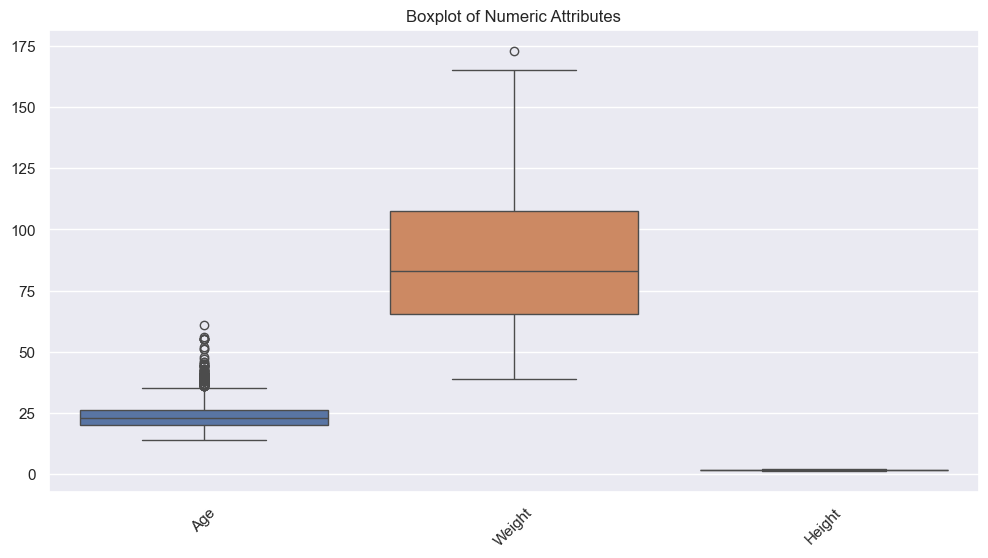

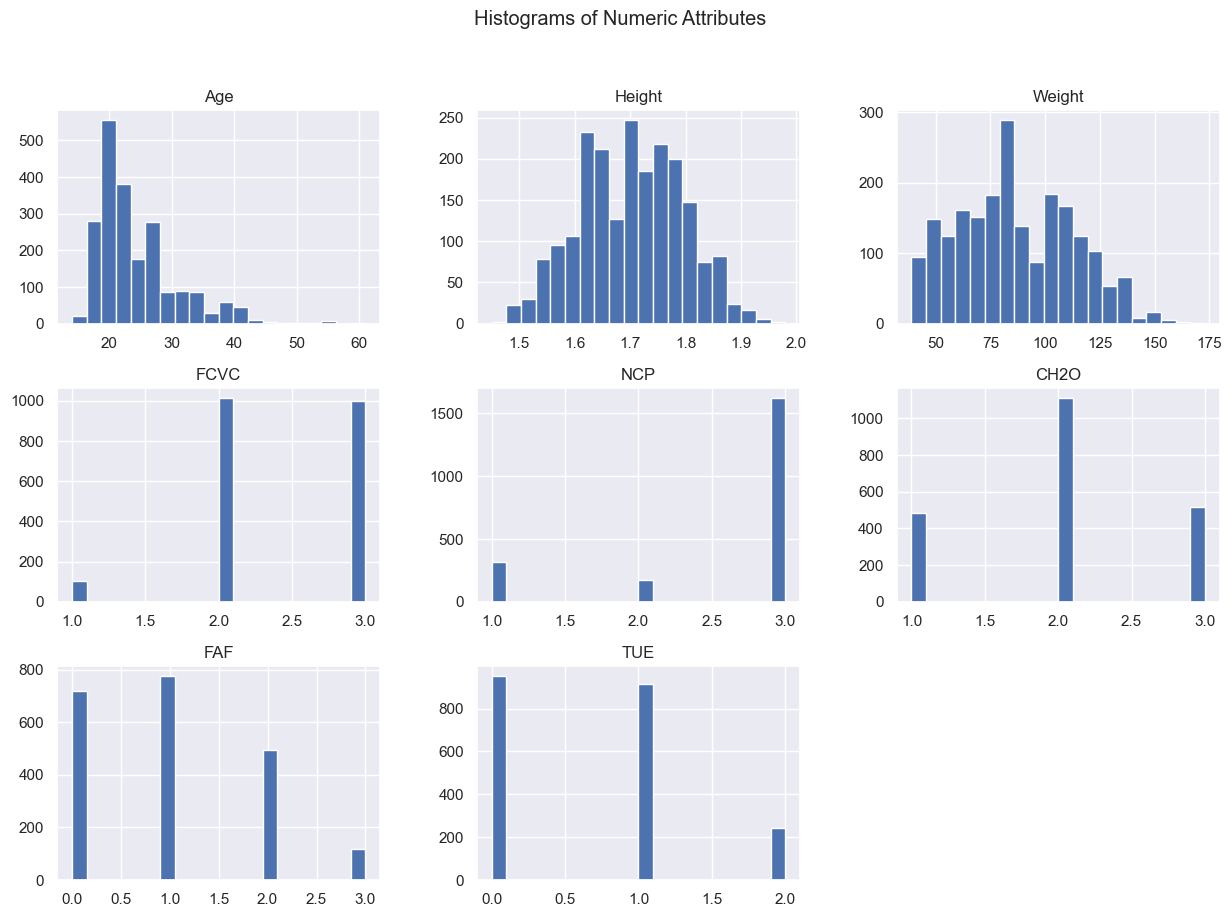

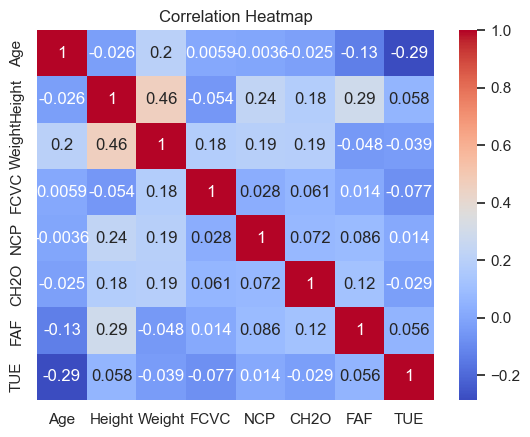

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

# Load dataset
df = pd.read_csv("../data/ObesityDataSet_Clean.csv")  

# Quick look at dataset
df.head()


# Summary statistics
# boxplot for Weight
sns.boxplot(y=df['Weight'])
plt.title("Boxplot of Weight")
plt.show()

# histogram for Height
sns.histplot(df['Height'], bins=20, kde=True)
plt.title("Distribution of Height")
plt.show()

cols_to_plot = ['Age', 'Weight', 'Height']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols_to_plot])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Attributes")
plt.show()

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numeric Attributes")
plt.show()




# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



/Users/ritasantos/miniforge3/envs/dtu02452/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ritasantos/miniforge3/envs/dtu02452/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ritasantos/miniforge3/envs/dtu02452/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


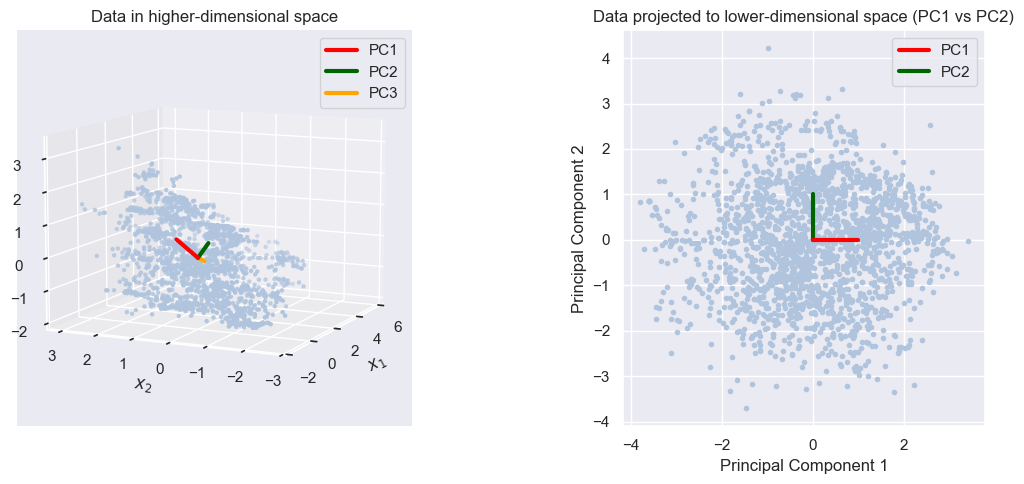

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv("../data/ObesityDataSet.csv") 

# Select numeric features 
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'FAF', 'TUE', 'CH2O', 'FCVC']
X = df[numeric_cols].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA parameters
M = 3  # number of components for visualization (3D)
K = 2  # number of components for projection (2D)

# Create PCA object
pca = PCA(n_components=M)

# Fit and transform the data to get B
# Get the principal components, V_K

B = pca.fit_transform(X_scaled)  # fit and transform standardized data
V_K = pca.components_.T[:, :K]  # first K principal components as columns


# Define colors for principal components
colors = ['red', 'darkgreen', 'orange']

# Create figure and subplot for high-dimensional data
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Data in higher-dimensional space')
ax.view_init(elev=10, azim=-155)  # set viewing angle

# Plot the high-dimensional data and first 3 principal components
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c='lightsteelblue', marker='.')
for i in range(3):  # plot PC1, PC2, PC3
    pc = pca.components_[i, :3]  # take first 3 coordinates of each PC
    ax.plot([0, pc[0]], [0, pc[1]], [0, pc[2]], color=colors[i], lw=3, label=f'PC{i+1}', zorder=5-i)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend()


ax2 = fig.add_subplot(122)
ax2.set_title('Data projected to lower-dimensional space (PC1 vs PC2)')

ax2.scatter(B[:, 0], B[:, 1], c='lightsteelblue', marker='.')
for i, pc in enumerate(np.eye(K)): 
    ax2.plot([0, pc[0]], [0, pc[1]], color=colors[i], lw=3, label=f'PC{i+1}', zorder=5-i)


ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_aspect('equal')
ax2.legend()

plt.tight_layout()
plt.show()

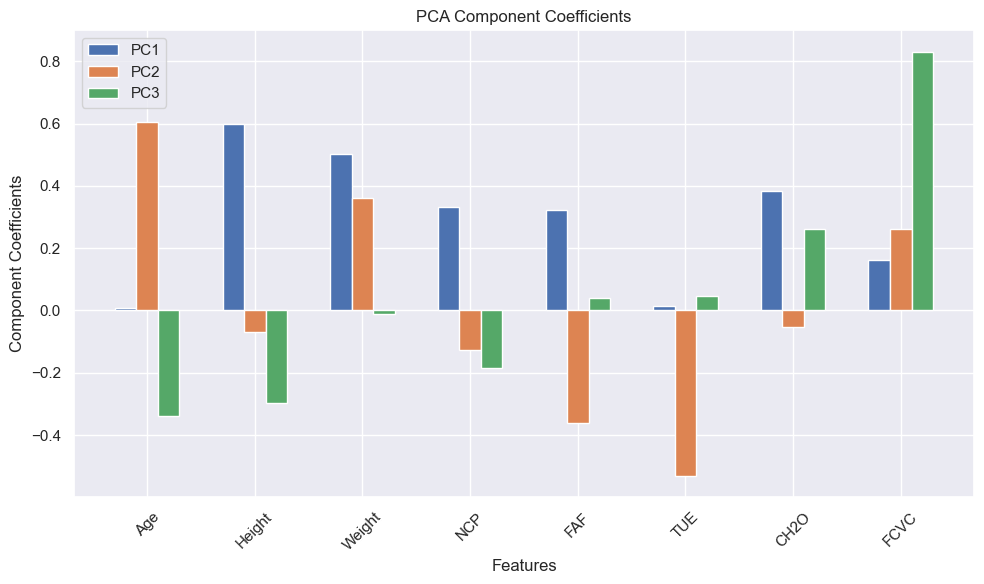

             PC1       PC2       PC3
Age     0.007592  0.603802 -0.338428
Height  0.598077 -0.070295 -0.298228
Weight  0.503661  0.361779 -0.011211
NCP     0.333123 -0.127778 -0.185856
FAF     0.321236 -0.361647  0.040501
TUE     0.014639 -0.531014  0.045231
CH2O    0.384655 -0.052993  0.260637
FCVC    0.161968  0.260187  0.830807


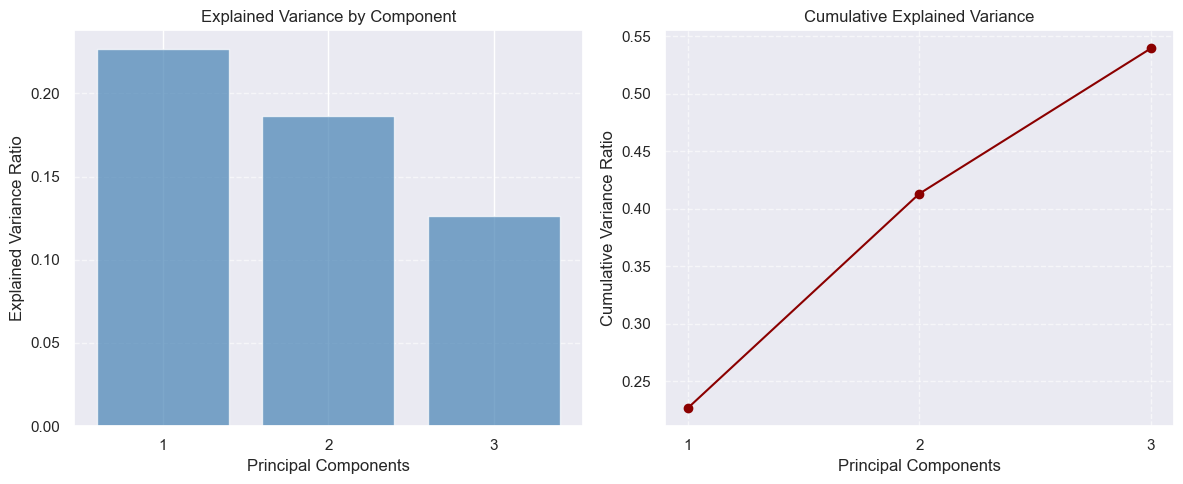

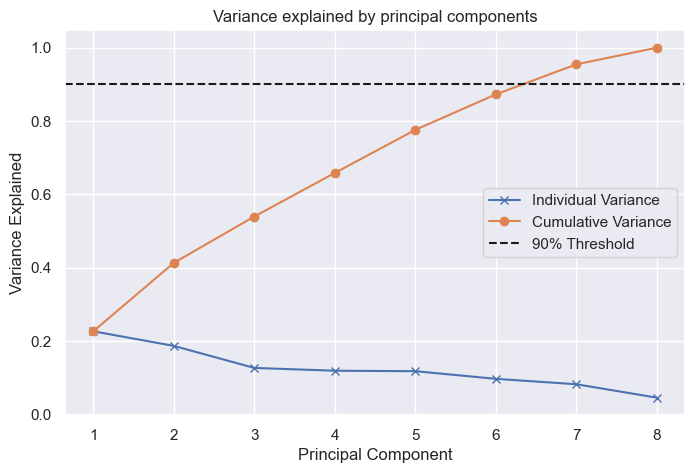

In [7]:



bw = 0.2
r = np.arange(1, len(numeric_cols) + 1)  

V = pca.components_.T  
M = 3  

plt.figure(figsize=(10, 6))
plt.title("PCA Component Coefficients")

for i in range(M):
    plt.bar(r + i * bw, V[:, i], width=bw, label=f"PC{i+1}")

plt.xticks(r + bw, numeric_cols, rotation=45)
plt.xlabel("Features")
plt.ylabel("Component Coefficients")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loadings = contribution of each feature to each PC
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numeric_cols
)

print(loadings)


explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(range(1, M+1), explained_var, alpha=0.7, color='steelblue')
axs[0].set_title("Explained Variance by Component")
axs[0].set_xlabel("Principal Components")
axs[0].set_ylabel("Explained Variance Ratio")
axs[0].set_xticks(range(1, M+1))
axs[0].grid(True, axis='y', linestyle='--', alpha=0.6)

axs[1].plot(range(1, M+1), cumulative_var, marker='o', color='darkred')
axs[1].set_title("Cumulative Explained Variance")
axs[1].set_xlabel("Principal Components")
axs[1].set_ylabel("Cumulative Variance Ratio")
axs[1].set_xticks(range(1, M+1))
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Full PCA for variance analysis (all components)
pca_full = PCA()
pca_full.fit(X_scaled)

rho = pca_full.explained_variance_ratio_
cumulative_rho = np.cumsum(rho)

threshold = 0.9  # 90% threshold

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual Variance")
plt.plot(range(1, len(rho) + 1), cumulative_rho, "o-", label="Cumulative Variance")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% Threshold")
plt.title("Variance explained by principal components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()



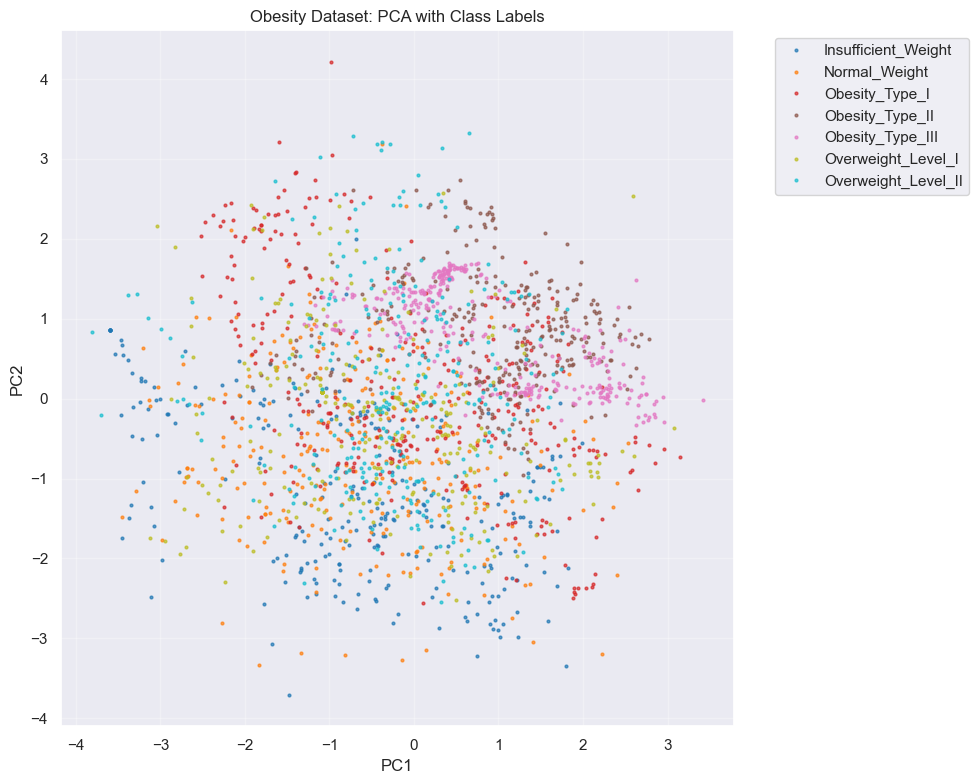

Class distribution:
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: count, dtype: int64


In [8]:

y = df['NObeyesdad'].values

PC_idxs = [0, 1] 
unique_classes = np.unique(y)  

fig = plt.figure(figsize=(10, 8))
plt.title("Obesity Dataset: PCA with Class Labels")

#  color palette for the different obesity classes
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))


for i, obesity_class in enumerate(unique_classes):
    mask = (y == obesity_class)
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.7, 
             color=colors[i], label=obesity_class, markersize=4)

plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Class distribution:")
print(pd.Series(y).value_counts().sort_index())